In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

from PIL import Image
import glob
import os

2.10.0
1.26.2


In [4]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 112x112 사이즈로 바꾸어 저장합니다.
	target_size=(112,112)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")


#리사이즈 함수 선언
#Pillow 함수 9.10부터 ANTIALIAS 사라지고 RANCZOS 함수 사용
	

In [5]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = 'C://Users/Desk_Kang/Desktop/Aiffel/workplace/Iamgroww/rock_scissor_paper/scissor'
resize_images(image_dir_path)

# 파일마다 모두 112x112 사이즈로 바꾸어 저장합니다.
print("가위 이미지 resize 완료!")


705  images to be resized.
705  images resized.
가위 이미지 resize 완료!


In [6]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = 'C://Users/Desk_Kang/Desktop/Aiffel/workplace/Iamgroww/rock_scissor_paper/rock'
resize_images(image_dir_path)

# 파일마다 모두 112x112 사이즈로 바꾸어 저장합니다.
print("바위 이미지 resize 완료!")


572  images to be resized.
572  images resized.
바위 이미지 resize 완료!


In [7]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = 'C://Users/Desk_Kang/Desktop/Aiffel/workplace/Iamgroww/rock_scissor_paper/paper'
resize_images(image_dir_path)

# 파일마다 모두 112x112 사이즈로 바꾸어 저장합니다.
print("보 이미지 resize 완료!")

550  images to be resized.
550  images resized.
보 이미지 resize 완료!


In [8]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

#분류에 좋다는 교차검증 가져와보기

In [9]:


def load_data(img_path, number_of_data=1827):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=112
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(X)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = 'C://Users/Desk_Kang/Desktop/Aiffel/workplace/Iamgroww/rock_scissor_paper'


(X, y)=load_data(image_dir_path)
X_norm = X/255.0   # 입력은 0~1 사이의 값으로 정규화\

print("X shape: {}".format(X.shape))
print("y shape: {}".format(y.shape))

#흠... 매니폴드 하고싶은데
#어짜피 테스트 데이터는 다른거에서 가져올 예정

학습데이터(X)의 이미지 개수는 1827 입니다.
X shape: (1827, 112, 112, 3)
y shape: (1827,)


라벨:  0


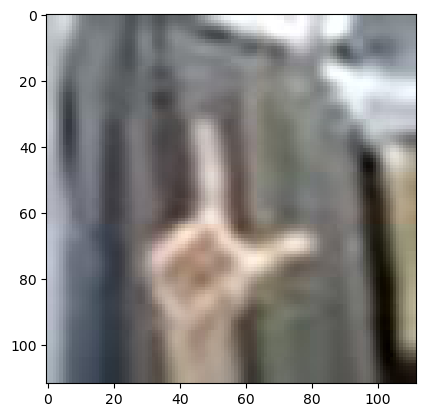

In [10]:
import matplotlib.pyplot as plt
plt.imshow(X[112])
print('라벨: ', y[112])

#111번째 이미지와 라벨링 표현

In [11]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras.layers import Dropout
#라이브러리 불러오고

In [12]:
#교차검증 데이터 분리
#5개로 나누고
n_fold = 5

#랜덤 시드 설정
#텐서에서 재현성 구현(공유시)
seed = 0
np.random.seed(seed)
tf.compat.v1.set_random_seed(seed)

accuracy=[]

kfold = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)

In [13]:
# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?

for train, test in kfold.split(X,y):
    model=keras.models.Sequential()
    model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(112,112,3)))
    model.add(keras.layers.AveragePooling2D(3,3))
    model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
    model.add(keras.layers.AveragePooling2D(3,3))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(keras.layers.Dense(3, activation='softmax'))

    model.summary()

    # model을 학습시키는 코드를 직접 작성해 보세요.
    # Hint! model.compile()과 model.fit()을 사용해 봅시다.
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

    #모델 학습
    history = model.fit(X_norm[train], y[train], epochs=7, validation_data= (X_norm[test], y[test]))
    accuracy.append(history.history['val_accuracy'])
    
    


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 110, 110, 32)      896       
                                                                 
 average_pooling2d (AverageP  (None, 36, 36, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 average_pooling2d_1 (Averag  (None, 11, 11, 64)       0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 7744)              0         
                                                                 
 dense (Dense)               (None, 128)               9

In [14]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
#테스트 사진 리사이즈

image_dir_path = 'C://Users/Desk_Kang/Desktop/Aiffel/workplace/Iamgroww/rock_scissor_paper/test/paper'
resize_images(image_dir_path)

image_dir_path = 'C://Users/Desk_Kang/Desktop/Aiffel/workplace/Iamgroww/rock_scissor_paper/test/rock'
resize_images(image_dir_path)

image_dir_path = 'C://Users/Desk_Kang/Desktop/Aiffel/workplace/Iamgroww/rock_scissor_paper/test/scissor'
resize_images(image_dir_path)


350  images to be resized.


350  images resized.
380  images to be resized.
380  images resized.
351  images to be resized.
351  images resized.


In [15]:
#테스트 데이터셋 불러오기

def load_data_t(img_path, number_of_data=1081):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=112
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = 'C://Users/Desk_Kang/Desktop/Aiffel/workplace/Iamgroww/rock_scissor_paper/test'
(x_test, y_test)=load_data_t(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 1081 입니다.
x_test shape: (1081, 112, 112, 3)
y_test shape: (1081,)


In [16]:

# Hint! model.evaluate()을 사용해 봅시다.
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

34/34 - 0s - loss: 5.0118 - accuracy: 0.3941 - 408ms/epoch - 12ms/step
test_loss: 5.011799335479736
test_accuracy: 0.3940795660018921


In [17]:
# keras tuner
import tensorflow as tf
import keras
import keras_tuner as kt
from sklearn.model_selection import train_test_split
import os

In [27]:
X_train = X.reshape(-1,112, 112, 3) 
X_test = x_test.reshape(-1,112,112,3)
y = tf.keras.utils.to_categorical(y)
y_test = tf.keras.utils.to_categorical(y_test)

In [24]:
class DeepTuner(kt.Tuner):
    def run_trial(self, trial, X, y, validation_data, **fit_kwargs):
        model = self.hypermodel.build(trial.hyperparameters)
        model.fit(X, y, batch_size=trial.hyperparameters.Choice(
            'batch_size', [16, 32]), **fit_kwargs)


        x_test, y_test = validation_data
        eval_scores = model.evaluate(x_test, y_test)
        return {name: value for name, value in zip(
            model.metrics_names,
            eval_scores)}

In [29]:
def build_model(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.Input(shape = X.shape[1:], name = 'inputs'))
    for i in range(hp.Int('num_layers', min_value=1, max_value=10)):
              model.add(tf.keras.layers.Conv2D(hp.Int(
                  'units_{i}'.format(i=i), min_value=32, max_value=128, step=5), (3,3),activation='relu'))
    model.add(tf.keras.layers.Flatten())
    for i in range(hp.Int('n_connections', 1, 3)):
        model.add(tf.keras.layers.Dense(hp.Choice(f'n_nodes',
                                  values=[32,64,128, 256]), activation = 'relu'))
    model.add(tf.keras.layers.Dense(3, activation='softmax', name = 'outputs'))
    model.compile(optimizer = 'adam',loss='categorical_crossentropy',
        metrics=['accuracy'])
    return model

In [30]:
my_keras_tuner = DeepTuner(
    oracle=kt.oracles.BayesianOptimizationOracle(
        objective=kt.Objective('accuracy', 'max'),
        max_trials=10,
        seed=42),
    hypermodel=build_model,
    overwrite=True,
    project_name='my_keras_tuner')

# 해당 모델 학습시간은 약 10분정도 걸립니다!
my_keras_tuner.search(
    X, y, validation_data=(x_test, y_test), epochs=3)

Trial 10 Complete [00h 00m 38s]
accuracy: 0.32747456431388855

Best accuracy So Far: 0.3755781650543213
Total elapsed time: 00h 04m 28s


In [34]:
best_hps = my_keras_tuner.get_best_hyperparameters(num_trials=10)[0]
model = build_model(best_hps)
model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_117 (Conv2D)         (None, 110, 110, 102)     2856      
                                                                 
 conv2d_118 (Conv2D)         (None, 108, 108, 42)      38598     
                                                                 
 conv2d_119 (Conv2D)         (None, 106, 106, 67)      25393     
                                                                 
 conv2d_120 (Conv2D)         (None, 104, 104, 37)      22348     
                                                                 
 conv2d_121 (Conv2D)         (None, 102, 102, 52)      17368     
                                                                 
 flatten_26 (Flatten)        (None, 541008)            0         
                                                                 
 dense_39 (Dense)            (None, 256)             

In [36]:
model.fit(X, y, batch_size=32, epochs = 5)

Epoch 1/5
58/58 [==============================] - 6s 96ms/step - loss: 101.4953 - accuracy: 0.3974
Epoch 2/5
58/58 [==============================] - 6s 95ms/step - loss: 0.7479 - accuracy: 0.6897
Epoch 3/5
58/58 [==============================] - 5s 92ms/step - loss: 0.2403 - accuracy: 0.9256
Epoch 4/5
58/58 [==============================] - 5s 91ms/step - loss: 0.0977 - accuracy: 0.9715
Epoch 5/5
58/58 [==============================] - 5s 91ms/step - loss: 0.0455 - accuracy: 0.9841


In [37]:
model.evaluate(x_test, y_test)

34/34 [==============================] - 1s 24ms/step - loss: 7.1272 - accuracy: 0.4838


[7.127200603485107, 0.48381128907203674]

### 튜닝 전

[5.011799335479736, 0.3940795660018921]

### 튜닝 후
[7.127200603485107, 0.48381128907203674]

In [44]:
save_path = 'C://Users/Desk_Kang/Desktop/Aiffel/workplace/lib/rspmodel'
fname = os.path.join(save_path, 'model')
model.save(fname)

INFO:tensorflow:Assets written to: C://Users/Desk_Kang/Desktop/Aiffel/workplace/lib/rspmodel\model/assets


INFO:tensorflow:Assets written to: C://Users/Desk_Kang/Desktop/Aiffel/workplace/lib/rspmodel\model/assets


In [46]:
load_path = 'C://Users/Desk_Kang/Desktop/Aiffel/workplace/lib/rspmodel/model'
best_model = tf.keras.models.load_model(load_path)

In [47]:
best_model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_117 (Conv2D)         (None, 110, 110, 102)     2856      
                                                                 
 conv2d_118 (Conv2D)         (None, 108, 108, 42)      38598     
                                                                 
 conv2d_119 (Conv2D)         (None, 106, 106, 67)      25393     
                                                                 
 conv2d_120 (Conv2D)         (None, 104, 104, 37)      22348     
                                                                 
 conv2d_121 (Conv2D)         (None, 102, 102, 52)      17368     
                                                                 
 flatten_26 (Flatten)        (None, 541008)            0         
                                                                 
 dense_39 (Dense)            (None, 256)             

In [48]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\DESK_K~1\AppData\Local\Temp\tmpx6r5xvli\assets


INFO:tensorflow:Assets written to: C:\Users\DESK_K~1\AppData\Local\Temp\tmpx6r5xvli\assets


In [49]:
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [50]:
interpreter = tf.lite.Interpreter(model_content=tflite_model)

signatures = interpreter.get_signature_list()
print(signatures)

{'serving_default': {'inputs': ['inputs'], 'outputs': ['outputs']}}


In [51]:
classify_lite = interpreter.get_signature_runner('serving_default')
classify_lite